In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error as mse
import xgboost as xgb
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('./merge_all_flatten.csv')
train_label = pd.read_csv('./train_label_add.csv')
train_label = train_label.sort_values('acc_id')

In [3]:
del data['minus']
del data['plus']

In [4]:
data_lbl = pd.merge(data, train_label, on='acc_id')
data_63_lbl = data_lbl[data_lbl['survival_time']!=64]
data_63 = data_63_lbl.drop(['total_spent','survival_time','secession','amount_spent_y'],axis=1)

In [12]:
 k =data_lbl[data_lbl['survival_time']<64]

In [63]:
surv1 = data_lbl[(data_lbl['survival_time']>=1) & (data_lbl['survival_time']<=10)]
surv2 = data_lbl[(data_lbl['survival_time']>=11) & (data_lbl['survival_time']<=20)]
#surv3 = data_lbl[(data_lbl['survival_time']>=21) & (data_lbl['survival_time']<=30)]
#surv4 = data_lbl[(data_lbl['survival_time']>=31) & (data_lbl['survival_time']<=40)]
#surv5 = data_lbl[(data_lbl['survival_time']>=41) & (data_lbl['survival_time']<=50)]
#surv6 = data_lbl[(data_lbl['survival_time']>=51) & (data_lbl['survival_time']<=63)]
#surv7 = data_lbl[(data_lbl['survival_time']>=43) & (data_lbl['survival_time']<=70)]
#surv8 = data_lbl[(data_lbl['survival_time']>=50) & (data_lbl['survival_time']<=56)]
#surv9 = data_lbl[(data_lbl['survival_time']>=57) & (data_lbl['survival_time']<=63)]
surv7 = data_lbl[(data_lbl['survival_time']==64)]



In [40]:
#surv1 = data_lbl[(data_lbl['survival_time']>=1) & (data_lbl['survival_time']<=20)]
#surv2 = data_lbl[(data_lbl['survival_time']>=21) & (data_lbl['survival_time']<=40)]
#surv3 = data_lbl[(data_lbl['survival_time']>=41) & (data_lbl['survival_time']<=63)]

In [44]:
surv7.describe().T.to_csv('./surv7_disc.csv')

(array([2711.,  616.,  296.,  308.,  319.,   87.,   92.,  117.,  235.,
         964.]),
 array([2.34065522e-03, 2.30882231e+00, 4.61530396e+00, 6.92178561e+00,
        9.22826726e+00, 1.15347489e+01, 1.38412306e+01, 1.61477122e+01,
        1.84541939e+01, 2.07606755e+01, 2.30671572e+01]),
 <a list of 10 Patch objects>)

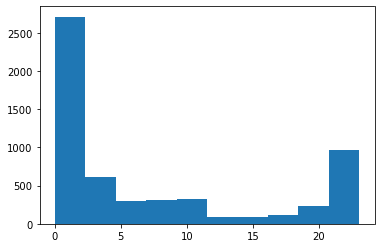

In [55]:
plt.hist(surv1['playtime_4'])

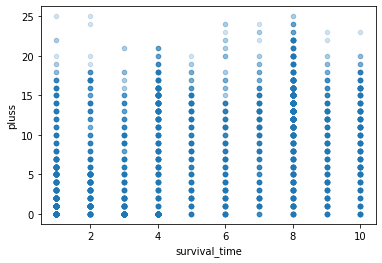

In [57]:
surv1.plot(kind='scatter', x='survival_time', y='pluss', alpha=0.2)

In [65]:
# 생존기간 1~10일인 유저의 생존기간과의 상관관계
c = surv1.corr()
c['survival_time'].sort_values(ascending=False)

survival_time              1.000000
day_sum                    0.527241
game_money_change_count    0.508650
day_count                  0.507362
playtime_count             0.507362
char_count                 0.507362
25                         0.505833
24                         0.503227
23                         0.491416
26                         0.489543
playtime_4                 0.480087
22                         0.465387
27                         0.458551
playtime_3                 0.448329
pluss                      0.444716
minuss                     0.444267
20                         0.443884
playtime_2                 0.434036
day_y                      0.432131
log_in_freq                0.427969
npc_kill_count             0.426484
solo_exp_count             0.420101
playtime_1                 0.416629
6                          0.413971
7                          0.413429
5                          0.412746
playtime                   0.410850
4                          0

In [64]:
# 생존기간 11~20일인 유저의 생존기간과의 상관관계
c = surv2.corr()
c['survival_time'].sort_values(ascending=False)

survival_time                1.000000
day_x                        0.090955
24                           0.089751
rich_monster                 0.084917
tday_count_s                 0.083380
quest_exp_count              0.081015
pay_count                    0.079583
tday_count_t                 0.079193
amount_spent_3               0.073423
hour_mean                    0.071178
hour_s_100                   0.069982
day_s                        0.067787
num_trade                    0.067757
num_trade_s                  0.066975
source_sum                   0.066975
hour_t                       0.065993
minuss                       0.065409
hour_s_400                   0.063990
day_t_m                      0.063851
23                           0.063839
type_shop_s                  0.062727
fishing_count                0.061002
num_trade_shop               0.060668
combat_char_cnt_4            0.060423
trade_ratio                  0.060141
type_shop_s_m                0.059941
item_1_s    

In [47]:
c = surv2.corr()
c['survival_time'].sort_values(ascending=False)

survival_time              1.000000
game_money_change_count    0.275981
day_count                  0.261988
char_count                 0.261988
playtime_count             0.261988
day_sum                    0.260265
playtime                   0.251343
total_spent                0.220912
tday_count_s               0.220778
private_shop               0.212830
private_shop_4             0.212429
private_shop_count         0.211292
private_shop_2             0.211139
private_shop_3             0.211017
playtime_3                 0.209643
private_shop_1             0.208867
minuss                     0.206449
1                          0.206036
playtime_4                 0.202552
playtime_1                 0.201324
3                          0.200873
playtime_2                 0.199712
4                          0.198330
2                          0.196456
7                          0.193595
11                         0.186616
merchant                   0.185500
6                          0

In [ ]:
data

In [70]:
def week_login(data):
    for i in range(0,4):    
        data['week'+str(i+1)+'_log'] = (data[str(i+1)] + data[str(i+2)] + data[str(i+3)] + data[str(i+4)] + data[str(i+5)] + data[str(i+6)] + data[str(i+7)]) / 7
        
    data = data.drop(['1','2','3','4','5','6','7','8','9','10','11','12','13','14',
                                               '15','16','17','18','19','20','21','22','23','24','25','26','27','28'], axis=1)

    return data